##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

 4202496/26421880 [===>..........................] - ETA: 0s

 9854976/26421880 [==========>...................] - ETA: 0s

15482880/26421880 [================>.............] - ETA: 0s

23625728/26421880 [=========================>....] - ETA: 0s

26427392/26421880 [==============================] - 0s 0us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

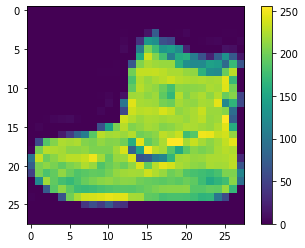

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

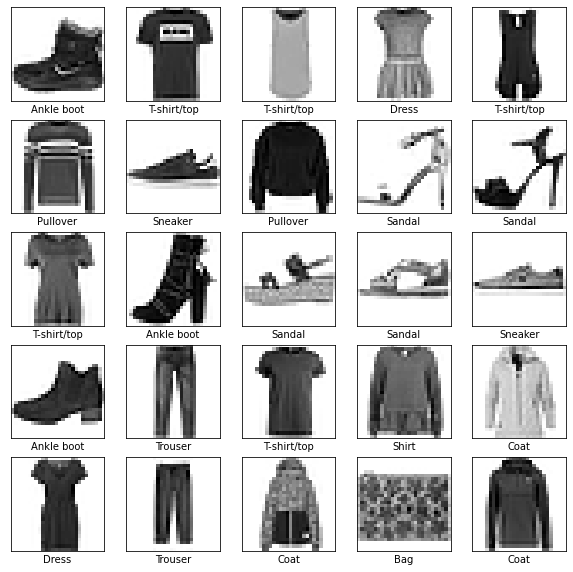

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 1s - loss: 2.4084 - accuracy: 0.0938

  35/1875 [..............................] - ETA: 2s - loss: 1.2894 - accuracy: 0.5857

  70/1875 [>.............................] - ETA: 2s - loss: 1.0295 - accuracy: 0.6567

 105/1875 [>.............................] - ETA: 2s - loss: 0.9114 - accuracy: 0.6923

 139/1875 [=>............................] - ETA: 2s - loss: 0.8543 - accuracy: 0.7100

 172/1875 [=>............................] - ETA: 2s - loss: 0.8011 - accuracy: 0.7271

 206/1875 [==>...........................] - ETA: 2s - loss: 0.7711 - accuracy: 0.7363

 241/1875 [==>...........................] - ETA: 2s - loss: 0.7394 - accuracy: 0.7478

 275/1875 [===>..........................] - ETA: 2s - loss: 0.7107 - accuracy: 0.7570

 310/1875 [===>..........................] - ETA: 2s - loss: 0.6957 - accuracy: 0.7614

 344/1875 [====>.........................] - ETA: 2s - loss: 0.6861 - accuracy: 0.7656

 378/1875 [=====>........................] - ETA: 2s - loss: 0.6702 - accuracy: 0.7718

 413/1875 [=====>........................] - ETA: 2s - loss: 0.6596 - accuracy: 0.7754

 448/1875 [======>.......................] - ETA: 2s - loss: 0.6446 - accuracy: 0.7797

 482/1875 [======>.......................] - ETA: 2s - loss: 0.6360 - accuracy: 0.7827

 516/1875 [=======>......................] - ETA: 2s - loss: 0.6252 - accuracy: 0.7859

 551/1875 [=======>......................] - ETA: 1s - loss: 0.6171 - accuracy: 0.7881

 586/1875 [========>.....................] - ETA: 1s - loss: 0.6083 - accuracy: 0.7912

 621/1875 [========>.....................] - ETA: 1s - loss: 0.5997 - accuracy: 0.7943

 654/1875 [=========>....................] - ETA: 1s - loss: 0.5937 - accuracy: 0.7961

 687/1875 [=========>....................] - ETA: 1s - loss: 0.5877 - accuracy: 0.7980

 721/1875 [==========>...................] - ETA: 1s - loss: 0.5804 - accuracy: 0.8001

 756/1875 [===========>..................] - ETA: 1s - loss: 0.5729 - accuracy: 0.8027

 790/1875 [===========>..................] - ETA: 1s - loss: 0.5697 - accuracy: 0.8042

 824/1875 [============>.................] - ETA: 1s - loss: 0.5658 - accuracy: 0.8052

 858/1875 [============>.................] - ETA: 1s - loss: 0.5599 - accuracy: 0.8074

 891/1875 [=============>................] - ETA: 1s - loss: 0.5572 - accuracy: 0.8084

 925/1875 [=============>................] - ETA: 1s - loss: 0.5529 - accuracy: 0.8095

 958/1875 [==============>...............] - ETA: 1s - loss: 0.5502 - accuracy: 0.8102

 992/1875 [==============>...............] - ETA: 1s - loss: 0.5482 - accuracy: 0.8106

1027/1875 [===============>..............] - ETA: 1s - loss: 0.5456 - accuracy: 0.8113

1061/1875 [===============>..............] - ETA: 1s - loss: 0.5418 - accuracy: 0.8126

1094/1875 [================>.............] - ETA: 1s - loss: 0.5385 - accuracy: 0.8138

1127/1875 [=================>............] - ETA: 1s - loss: 0.5346 - accuracy: 0.8148

1161/1875 [=================>............] - ETA: 1s - loss: 0.5324 - accuracy: 0.8157

1194/1875 [==================>...........] - ETA: 1s - loss: 0.5310 - accuracy: 0.8161

1227/1875 [==================>...........] - ETA: 0s - loss: 0.5294 - accuracy: 0.8165

1260/1875 [===================>..........] - ETA: 0s - loss: 0.5275 - accuracy: 0.8169

1294/1875 [===================>..........] - ETA: 0s - loss: 0.5266 - accuracy: 0.8172

1328/1875 [====================>.........] - ETA: 0s - loss: 0.5240 - accuracy: 0.8181

1362/1875 [====================>.........] - ETA: 0s - loss: 0.5214 - accuracy: 0.8188

1396/1875 [=====================>........] - ETA: 0s - loss: 0.5181 - accuracy: 0.8200

1429/1875 [=====================>........] - ETA: 0s - loss: 0.5151 - accuracy: 0.8207

1461/1875 [======================>.......] - ETA: 0s - loss: 0.5134 - accuracy: 0.8212

1494/1875 [======================>.......] - ETA: 0s - loss: 0.5111 - accuracy: 0.8221

1529/1875 [=======================>......] - ETA: 0s - loss: 0.5086 - accuracy: 0.8229

1564/1875 [========================>.....] - ETA: 0s - loss: 0.5077 - accuracy: 0.8231

1598/1875 [========================>.....] - ETA: 0s - loss: 0.5052 - accuracy: 0.8236

1633/1875 [=========================>....] - ETA: 0s - loss: 0.5032 - accuracy: 0.8244

1667/1875 [=========================>....] - ETA: 0s - loss: 0.5022 - accuracy: 0.8245

1701/1875 [==========================>...] - ETA: 0s - loss: 0.5006 - accuracy: 0.8249

1734/1875 [==========================>...] - ETA: 0s - loss: 0.4996 - accuracy: 0.8253

1767/1875 [===========================>..] - ETA: 0s - loss: 0.4975 - accuracy: 0.8260

1800/1875 [===========================>..] - ETA: 0s - loss: 0.4951 - accuracy: 0.8266

1834/1875 [============================>.] - ETA: 0s - loss: 0.4932 - accuracy: 0.8274

1867/1875 [============================>.] - ETA: 0s - loss: 0.4920 - accuracy: 0.8276

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4917 - accuracy: 0.8277


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.5414 - accuracy: 0.8125

  36/1875 [..............................] - ETA: 2s - loss: 0.3838 - accuracy: 0.8594

  71/1875 [>.............................] - ETA: 2s - loss: 0.3885 - accuracy: 0.8596

 104/1875 [>.............................] - ETA: 2s - loss: 0.3732 - accuracy: 0.8684

 138/1875 [=>............................] - ETA: 2s - loss: 0.3872 - accuracy: 0.8614

 171/1875 [=>............................] - ETA: 2s - loss: 0.3838 - accuracy: 0.8635

 204/1875 [==>...........................] - ETA: 2s - loss: 0.3863 - accuracy: 0.8620

 237/1875 [==>...........................] - ETA: 2s - loss: 0.3938 - accuracy: 0.8602

 270/1875 [===>..........................] - ETA: 2s - loss: 0.3939 - accuracy: 0.8593

 304/1875 [===>..........................] - ETA: 2s - loss: 0.3981 - accuracy: 0.8567

 338/1875 [====>.........................] - ETA: 2s - loss: 0.3977 - accuracy: 0.8570

 373/1875 [====>.........................] - ETA: 2s - loss: 0.3968 - accuracy: 0.8569

 407/1875 [=====>........................] - ETA: 2s - loss: 0.3931 - accuracy: 0.8585

 442/1875 [======>.......................] - ETA: 2s - loss: 0.3932 - accuracy: 0.8589

 476/1875 [======>.......................] - ETA: 2s - loss: 0.3898 - accuracy: 0.8612

 510/1875 [=======>......................] - ETA: 2s - loss: 0.3881 - accuracy: 0.8612

 543/1875 [=======>......................] - ETA: 1s - loss: 0.3860 - accuracy: 0.8619

 578/1875 [========>.....................] - ETA: 1s - loss: 0.3861 - accuracy: 0.8620

 613/1875 [========>.....................] - ETA: 1s - loss: 0.3884 - accuracy: 0.8610

 647/1875 [=========>....................] - ETA: 1s - loss: 0.3884 - accuracy: 0.8618

 682/1875 [=========>....................] - ETA: 1s - loss: 0.3866 - accuracy: 0.8631

 717/1875 [==========>...................] - ETA: 1s - loss: 0.3859 - accuracy: 0.8628

 752/1875 [===========>..................] - ETA: 1s - loss: 0.3865 - accuracy: 0.8623

 786/1875 [===========>..................] - ETA: 1s - loss: 0.3855 - accuracy: 0.8631

 820/1875 [============>.................] - ETA: 1s - loss: 0.3859 - accuracy: 0.8629

 854/1875 [============>.................] - ETA: 1s - loss: 0.3850 - accuracy: 0.8630

 889/1875 [=============>................] - ETA: 1s - loss: 0.3850 - accuracy: 0.8629

 924/1875 [=============>................] - ETA: 1s - loss: 0.3838 - accuracy: 0.8634

 959/1875 [==============>...............] - ETA: 1s - loss: 0.3829 - accuracy: 0.8636

 994/1875 [==============>...............] - ETA: 1s - loss: 0.3830 - accuracy: 0.8640

1027/1875 [===============>..............] - ETA: 1s - loss: 0.3818 - accuracy: 0.8643

1061/1875 [===============>..............] - ETA: 1s - loss: 0.3808 - accuracy: 0.8646

1095/1875 [================>.............] - ETA: 1s - loss: 0.3799 - accuracy: 0.8649

1129/1875 [=================>............] - ETA: 1s - loss: 0.3795 - accuracy: 0.8649

1162/1875 [=================>............] - ETA: 1s - loss: 0.3784 - accuracy: 0.8655

1195/1875 [==================>...........] - ETA: 1s - loss: 0.3787 - accuracy: 0.8652

1228/1875 [==================>...........] - ETA: 0s - loss: 0.3777 - accuracy: 0.8656

1263/1875 [===================>..........] - ETA: 0s - loss: 0.3776 - accuracy: 0.8655

1298/1875 [===================>..........] - ETA: 0s - loss: 0.3782 - accuracy: 0.8654

1331/1875 [====================>.........] - ETA: 0s - loss: 0.3785 - accuracy: 0.8649

1365/1875 [====================>.........] - ETA: 0s - loss: 0.3780 - accuracy: 0.8652

1398/1875 [=====================>........] - ETA: 0s - loss: 0.3774 - accuracy: 0.8656

1432/1875 [=====================>........] - ETA: 0s - loss: 0.3769 - accuracy: 0.8656

1466/1875 [======================>.......] - ETA: 0s - loss: 0.3763 - accuracy: 0.8656

1499/1875 [======================>.......] - ETA: 0s - loss: 0.3753 - accuracy: 0.8658

1534/1875 [=======================>......] - ETA: 0s - loss: 0.3749 - accuracy: 0.8659

1568/1875 [========================>.....] - ETA: 0s - loss: 0.3743 - accuracy: 0.8660

1602/1875 [========================>.....] - ETA: 0s - loss: 0.3742 - accuracy: 0.8661

1635/1875 [=========================>....] - ETA: 0s - loss: 0.3741 - accuracy: 0.8662

1669/1875 [=========================>....] - ETA: 0s - loss: 0.3742 - accuracy: 0.8662

1702/1875 [==========================>...] - ETA: 0s - loss: 0.3731 - accuracy: 0.8664

1735/1875 [==========================>...] - ETA: 0s - loss: 0.3725 - accuracy: 0.8666

1768/1875 [===========================>..] - ETA: 0s - loss: 0.3727 - accuracy: 0.8664

1802/1875 [===========================>..] - ETA: 0s - loss: 0.3720 - accuracy: 0.8666

1836/1875 [============================>.] - ETA: 0s - loss: 0.3709 - accuracy: 0.8670

1871/1875 [============================>.] - ETA: 0s - loss: 0.3702 - accuracy: 0.8674

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3702 - accuracy: 0.8674


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2502 - accuracy: 0.8750

  36/1875 [..............................] - ETA: 2s - loss: 0.3424 - accuracy: 0.8707

  70/1875 [>.............................] - ETA: 2s - loss: 0.3471 - accuracy: 0.8728

 104/1875 [>.............................] - ETA: 2s - loss: 0.3477 - accuracy: 0.8669

 138/1875 [=>............................] - ETA: 2s - loss: 0.3407 - accuracy: 0.8712

 171/1875 [=>............................] - ETA: 2s - loss: 0.3464 - accuracy: 0.8704

 204/1875 [==>...........................] - ETA: 2s - loss: 0.3464 - accuracy: 0.8699

 237/1875 [==>...........................] - ETA: 2s - loss: 0.3460 - accuracy: 0.8700

 271/1875 [===>..........................] - ETA: 2s - loss: 0.3421 - accuracy: 0.8717

 305/1875 [===>..........................] - ETA: 2s - loss: 0.3433 - accuracy: 0.8717

 338/1875 [====>.........................] - ETA: 2s - loss: 0.3423 - accuracy: 0.8726

 371/1875 [====>.........................] - ETA: 2s - loss: 0.3406 - accuracy: 0.8749

 406/1875 [=====>........................] - ETA: 2s - loss: 0.3423 - accuracy: 0.8740

 440/1875 [======>.......................] - ETA: 2s - loss: 0.3410 - accuracy: 0.8746

 473/1875 [======>.......................] - ETA: 2s - loss: 0.3407 - accuracy: 0.8747

 507/1875 [=======>......................] - ETA: 2s - loss: 0.3417 - accuracy: 0.8743

 540/1875 [=======>......................] - ETA: 2s - loss: 0.3430 - accuracy: 0.8737

 573/1875 [========>.....................] - ETA: 1s - loss: 0.3439 - accuracy: 0.8741

 606/1875 [========>.....................] - ETA: 1s - loss: 0.3424 - accuracy: 0.8748

 639/1875 [=========>....................] - ETA: 1s - loss: 0.3438 - accuracy: 0.8737

 673/1875 [=========>....................] - ETA: 1s - loss: 0.3416 - accuracy: 0.8742

 708/1875 [==========>...................] - ETA: 1s - loss: 0.3425 - accuracy: 0.8739

 743/1875 [==========>...................] - ETA: 1s - loss: 0.3424 - accuracy: 0.8746

 777/1875 [===========>..................] - ETA: 1s - loss: 0.3423 - accuracy: 0.8754

 811/1875 [===========>..................] - ETA: 1s - loss: 0.3419 - accuracy: 0.8760

 845/1875 [============>.................] - ETA: 1s - loss: 0.3403 - accuracy: 0.8763

 879/1875 [=============>................] - ETA: 1s - loss: 0.3401 - accuracy: 0.8764

 913/1875 [=============>................] - ETA: 1s - loss: 0.3407 - accuracy: 0.8762

 947/1875 [==============>...............] - ETA: 1s - loss: 0.3408 - accuracy: 0.8760

 981/1875 [==============>...............] - ETA: 1s - loss: 0.3408 - accuracy: 0.8757

1014/1875 [===============>..............] - ETA: 1s - loss: 0.3402 - accuracy: 0.8754

1048/1875 [===============>..............] - ETA: 1s - loss: 0.3402 - accuracy: 0.8754

1081/1875 [================>.............] - ETA: 1s - loss: 0.3405 - accuracy: 0.8755

1115/1875 [================>.............] - ETA: 1s - loss: 0.3401 - accuracy: 0.8757

1149/1875 [=================>............] - ETA: 1s - loss: 0.3395 - accuracy: 0.8761

1181/1875 [=================>............] - ETA: 1s - loss: 0.3372 - accuracy: 0.8771

1214/1875 [==================>...........] - ETA: 0s - loss: 0.3362 - accuracy: 0.8777

1247/1875 [==================>...........] - ETA: 0s - loss: 0.3358 - accuracy: 0.8778

1281/1875 [===================>..........] - ETA: 0s - loss: 0.3353 - accuracy: 0.8779

1316/1875 [====================>.........] - ETA: 0s - loss: 0.3351 - accuracy: 0.8778

1350/1875 [====================>.........] - ETA: 0s - loss: 0.3348 - accuracy: 0.8780

1384/1875 [=====================>........] - ETA: 0s - loss: 0.3356 - accuracy: 0.8775

1419/1875 [=====================>........] - ETA: 0s - loss: 0.3343 - accuracy: 0.8783

1454/1875 [======================>.......] - ETA: 0s - loss: 0.3347 - accuracy: 0.8782

1488/1875 [======================>.......] - ETA: 0s - loss: 0.3352 - accuracy: 0.8780

1521/1875 [=======================>......] - ETA: 0s - loss: 0.3349 - accuracy: 0.8781

1554/1875 [=======================>......] - ETA: 0s - loss: 0.3350 - accuracy: 0.8782

1588/1875 [========================>.....] - ETA: 0s - loss: 0.3355 - accuracy: 0.8781

1622/1875 [========================>.....] - ETA: 0s - loss: 0.3342 - accuracy: 0.8787

1656/1875 [=========================>....] - ETA: 0s - loss: 0.3341 - accuracy: 0.8788

1689/1875 [==========================>...] - ETA: 0s - loss: 0.3343 - accuracy: 0.8787

1722/1875 [==========================>...] - ETA: 0s - loss: 0.3338 - accuracy: 0.8788

1756/1875 [===========================>..] - ETA: 0s - loss: 0.3338 - accuracy: 0.8787

1789/1875 [===========================>..] - ETA: 0s - loss: 0.3336 - accuracy: 0.8789

1823/1875 [============================>.] - ETA: 0s - loss: 0.3334 - accuracy: 0.8790

1856/1875 [============================>.] - ETA: 0s - loss: 0.3331 - accuracy: 0.8792

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3328 - accuracy: 0.8793


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3749 - accuracy: 0.8438

  34/1875 [..............................] - ETA: 2s - loss: 0.3157 - accuracy: 0.8805

  67/1875 [>.............................] - ETA: 2s - loss: 0.3085 - accuracy: 0.8829

 101/1875 [>.............................] - ETA: 2s - loss: 0.3201 - accuracy: 0.8806

 135/1875 [=>............................] - ETA: 2s - loss: 0.3114 - accuracy: 0.8840

 169/1875 [=>............................] - ETA: 2s - loss: 0.3178 - accuracy: 0.8828

 202/1875 [==>...........................] - ETA: 2s - loss: 0.3194 - accuracy: 0.8815

 236/1875 [==>...........................] - ETA: 2s - loss: 0.3118 - accuracy: 0.8856

 270/1875 [===>..........................] - ETA: 2s - loss: 0.3136 - accuracy: 0.8850

 305/1875 [===>..........................] - ETA: 2s - loss: 0.3164 - accuracy: 0.8840

 339/1875 [====>.........................] - ETA: 2s - loss: 0.3193 - accuracy: 0.8815

 371/1875 [====>.........................] - ETA: 2s - loss: 0.3166 - accuracy: 0.8831

 404/1875 [=====>........................] - ETA: 2s - loss: 0.3180 - accuracy: 0.8830

 437/1875 [=====>........................] - ETA: 2s - loss: 0.3171 - accuracy: 0.8840

 470/1875 [======>.......................] - ETA: 2s - loss: 0.3177 - accuracy: 0.8849

 503/1875 [=======>......................] - ETA: 2s - loss: 0.3154 - accuracy: 0.8861

 539/1875 [=======>......................] - ETA: 2s - loss: 0.3141 - accuracy: 0.8867

 574/1875 [========>.....................] - ETA: 1s - loss: 0.3116 - accuracy: 0.8877

 608/1875 [========>.....................] - ETA: 1s - loss: 0.3131 - accuracy: 0.8871

 641/1875 [=========>....................] - ETA: 1s - loss: 0.3110 - accuracy: 0.8875

 676/1875 [=========>....................] - ETA: 1s - loss: 0.3107 - accuracy: 0.8878

 712/1875 [==========>...................] - ETA: 1s - loss: 0.3106 - accuracy: 0.8871

 746/1875 [==========>...................] - ETA: 1s - loss: 0.3115 - accuracy: 0.8866

 780/1875 [===========>..................] - ETA: 1s - loss: 0.3113 - accuracy: 0.8868

 814/1875 [============>.................] - ETA: 1s - loss: 0.3128 - accuracy: 0.8859

 848/1875 [============>.................] - ETA: 1s - loss: 0.3127 - accuracy: 0.8860

 882/1875 [=============>................] - ETA: 1s - loss: 0.3120 - accuracy: 0.8859

 916/1875 [=============>................] - ETA: 1s - loss: 0.3112 - accuracy: 0.8861

 950/1875 [==============>...............] - ETA: 1s - loss: 0.3115 - accuracy: 0.8862

 984/1875 [==============>...............] - ETA: 1s - loss: 0.3136 - accuracy: 0.8854

1019/1875 [===============>..............] - ETA: 1s - loss: 0.3151 - accuracy: 0.8847

1054/1875 [===============>..............] - ETA: 1s - loss: 0.3140 - accuracy: 0.8851

1090/1875 [================>.............] - ETA: 1s - loss: 0.3138 - accuracy: 0.8849

1125/1875 [=================>............] - ETA: 1s - loss: 0.3127 - accuracy: 0.8854

1159/1875 [=================>............] - ETA: 1s - loss: 0.3125 - accuracy: 0.8857

1194/1875 [==================>...........] - ETA: 1s - loss: 0.3115 - accuracy: 0.8858

1227/1875 [==================>...........] - ETA: 0s - loss: 0.3113 - accuracy: 0.8859

1262/1875 [===================>..........] - ETA: 0s - loss: 0.3122 - accuracy: 0.8856

1298/1875 [===================>..........] - ETA: 0s - loss: 0.3121 - accuracy: 0.8857

1332/1875 [====================>.........] - ETA: 0s - loss: 0.3129 - accuracy: 0.8856

1366/1875 [====================>.........] - ETA: 0s - loss: 0.3127 - accuracy: 0.8855

1401/1875 [=====================>........] - ETA: 0s - loss: 0.3114 - accuracy: 0.8860

1436/1875 [=====================>........] - ETA: 0s - loss: 0.3112 - accuracy: 0.8862

1471/1875 [======================>.......] - ETA: 0s - loss: 0.3119 - accuracy: 0.8858

1506/1875 [=======================>......] - ETA: 0s - loss: 0.3122 - accuracy: 0.8858

1541/1875 [=======================>......] - ETA: 0s - loss: 0.3121 - accuracy: 0.8858

1576/1875 [========================>.....] - ETA: 0s - loss: 0.3119 - accuracy: 0.8858

1611/1875 [========================>.....] - ETA: 0s - loss: 0.3116 - accuracy: 0.8858

1645/1875 [=========================>....] - ETA: 0s - loss: 0.3112 - accuracy: 0.8859

1679/1875 [=========================>....] - ETA: 0s - loss: 0.3113 - accuracy: 0.8857

1713/1875 [==========================>...] - ETA: 0s - loss: 0.3102 - accuracy: 0.8859

1748/1875 [==========================>...] - ETA: 0s - loss: 0.3095 - accuracy: 0.8863

1782/1875 [===========================>..] - ETA: 0s - loss: 0.3104 - accuracy: 0.8857

1816/1875 [============================>.] - ETA: 0s - loss: 0.3107 - accuracy: 0.8855

1850/1875 [============================>.] - ETA: 0s - loss: 0.3109 - accuracy: 0.8857

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3106 - accuracy: 0.8859


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1569 - accuracy: 0.9375

  35/1875 [..............................] - ETA: 2s - loss: 0.2726 - accuracy: 0.9054

  69/1875 [>.............................] - ETA: 2s - loss: 0.2785 - accuracy: 0.8976

 104/1875 [>.............................] - ETA: 2s - loss: 0.2844 - accuracy: 0.8957

 139/1875 [=>............................] - ETA: 2s - loss: 0.2886 - accuracy: 0.8939

 174/1875 [=>............................] - ETA: 2s - loss: 0.2917 - accuracy: 0.8935

 209/1875 [==>...........................] - ETA: 2s - loss: 0.2910 - accuracy: 0.8934

 243/1875 [==>...........................] - ETA: 2s - loss: 0.2873 - accuracy: 0.8939

 278/1875 [===>..........................] - ETA: 2s - loss: 0.2902 - accuracy: 0.8929

 313/1875 [====>.........................] - ETA: 2s - loss: 0.2875 - accuracy: 0.8937

 347/1875 [====>.........................] - ETA: 2s - loss: 0.2881 - accuracy: 0.8935

 382/1875 [=====>........................] - ETA: 2s - loss: 0.2890 - accuracy: 0.8934

 416/1875 [=====>........................] - ETA: 2s - loss: 0.2890 - accuracy: 0.8928

 450/1875 [======>.......................] - ETA: 2s - loss: 0.2889 - accuracy: 0.8922

 484/1875 [======>.......................] - ETA: 2s - loss: 0.2912 - accuracy: 0.8917

 518/1875 [=======>......................] - ETA: 1s - loss: 0.2919 - accuracy: 0.8917

 553/1875 [=======>......................] - ETA: 1s - loss: 0.2935 - accuracy: 0.8913

 587/1875 [========>.....................] - ETA: 1s - loss: 0.2932 - accuracy: 0.8912

 622/1875 [========>.....................] - ETA: 1s - loss: 0.2945 - accuracy: 0.8910

 655/1875 [=========>....................] - ETA: 1s - loss: 0.2949 - accuracy: 0.8916

 690/1875 [==========>...................] - ETA: 1s - loss: 0.2952 - accuracy: 0.8914

 725/1875 [==========>...................] - ETA: 1s - loss: 0.2943 - accuracy: 0.8918

 760/1875 [===========>..................] - ETA: 1s - loss: 0.2937 - accuracy: 0.8917

 794/1875 [===========>..................] - ETA: 1s - loss: 0.2930 - accuracy: 0.8920

 828/1875 [============>.................] - ETA: 1s - loss: 0.2944 - accuracy: 0.8913

 861/1875 [============>.................] - ETA: 1s - loss: 0.2922 - accuracy: 0.8921

 896/1875 [=============>................] - ETA: 1s - loss: 0.2932 - accuracy: 0.8917

 930/1875 [=============>................] - ETA: 1s - loss: 0.2928 - accuracy: 0.8917

 963/1875 [==============>...............] - ETA: 1s - loss: 0.2922 - accuracy: 0.8917

 998/1875 [==============>...............] - ETA: 1s - loss: 0.2924 - accuracy: 0.8917

1033/1875 [===============>..............] - ETA: 1s - loss: 0.2920 - accuracy: 0.8919

1068/1875 [================>.............] - ETA: 1s - loss: 0.2917 - accuracy: 0.8921

1102/1875 [================>.............] - ETA: 1s - loss: 0.2929 - accuracy: 0.8916

1136/1875 [=================>............] - ETA: 1s - loss: 0.2930 - accuracy: 0.8916

1171/1875 [=================>............] - ETA: 1s - loss: 0.2923 - accuracy: 0.8918

1206/1875 [==================>...........] - ETA: 0s - loss: 0.2924 - accuracy: 0.8921

1242/1875 [==================>...........] - ETA: 0s - loss: 0.2919 - accuracy: 0.8927

1277/1875 [===================>..........] - ETA: 0s - loss: 0.2919 - accuracy: 0.8924

1312/1875 [===================>..........] - ETA: 0s - loss: 0.2910 - accuracy: 0.8929

1348/1875 [====================>.........] - ETA: 0s - loss: 0.2917 - accuracy: 0.8926

1384/1875 [=====================>........] - ETA: 0s - loss: 0.2921 - accuracy: 0.8929

1418/1875 [=====================>........] - ETA: 0s - loss: 0.2920 - accuracy: 0.8928

1454/1875 [======================>.......] - ETA: 0s - loss: 0.2924 - accuracy: 0.8927

1489/1875 [======================>.......] - ETA: 0s - loss: 0.2922 - accuracy: 0.8927

1524/1875 [=======================>......] - ETA: 0s - loss: 0.2915 - accuracy: 0.8927

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2917 - accuracy: 0.8928

1594/1875 [========================>.....] - ETA: 0s - loss: 0.2910 - accuracy: 0.8930

1627/1875 [=========================>....] - ETA: 0s - loss: 0.2906 - accuracy: 0.8931

1661/1875 [=========================>....] - ETA: 0s - loss: 0.2901 - accuracy: 0.8931

1696/1875 [==========================>...] - ETA: 0s - loss: 0.2900 - accuracy: 0.8931

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2899 - accuracy: 0.8933

1766/1875 [===========================>..] - ETA: 0s - loss: 0.2908 - accuracy: 0.8929

1800/1875 [===========================>..] - ETA: 0s - loss: 0.2913 - accuracy: 0.8926

1835/1875 [============================>.] - ETA: 0s - loss: 0.2916 - accuracy: 0.8926

1871/1875 [============================>.] - ETA: 0s - loss: 0.2916 - accuracy: 0.8926

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2915 - accuracy: 0.8927


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8750

  37/1875 [..............................] - ETA: 2s - loss: 0.2586 - accuracy: 0.8919

  73/1875 [>.............................] - ETA: 2s - loss: 0.2510 - accuracy: 0.8951

 109/1875 [>.............................] - ETA: 2s - loss: 0.2485 - accuracy: 0.8994

 145/1875 [=>............................] - ETA: 2s - loss: 0.2497 - accuracy: 0.8987

 181/1875 [=>............................] - ETA: 2s - loss: 0.2594 - accuracy: 0.8968

 216/1875 [==>...........................] - ETA: 2s - loss: 0.2650 - accuracy: 0.8963

 252/1875 [===>..........................] - ETA: 2s - loss: 0.2675 - accuracy: 0.8956

 288/1875 [===>..........................] - ETA: 2s - loss: 0.2623 - accuracy: 0.8988

 322/1875 [====>.........................] - ETA: 2s - loss: 0.2627 - accuracy: 0.8998

 355/1875 [====>.........................] - ETA: 2s - loss: 0.2654 - accuracy: 0.8989

 390/1875 [=====>........................] - ETA: 2s - loss: 0.2637 - accuracy: 0.8996

 423/1875 [=====>........................] - ETA: 2s - loss: 0.2653 - accuracy: 0.8998

 457/1875 [======>.......................] - ETA: 2s - loss: 0.2666 - accuracy: 0.9001

 491/1875 [======>.......................] - ETA: 2s - loss: 0.2674 - accuracy: 0.9001

 525/1875 [=======>......................] - ETA: 1s - loss: 0.2676 - accuracy: 0.8992

 558/1875 [=======>......................] - ETA: 1s - loss: 0.2689 - accuracy: 0.8981

 591/1875 [========>.....................] - ETA: 1s - loss: 0.2705 - accuracy: 0.8983

 625/1875 [=========>....................] - ETA: 1s - loss: 0.2701 - accuracy: 0.8984

 659/1875 [=========>....................] - ETA: 1s - loss: 0.2713 - accuracy: 0.8981

 692/1875 [==========>...................] - ETA: 1s - loss: 0.2714 - accuracy: 0.8986

 726/1875 [==========>...................] - ETA: 1s - loss: 0.2701 - accuracy: 0.8993

 761/1875 [===========>..................] - ETA: 1s - loss: 0.2714 - accuracy: 0.8987

 795/1875 [===========>..................] - ETA: 1s - loss: 0.2725 - accuracy: 0.8982

 829/1875 [============>.................] - ETA: 1s - loss: 0.2730 - accuracy: 0.8978

 864/1875 [============>.................] - ETA: 1s - loss: 0.2745 - accuracy: 0.8971

 897/1875 [=============>................] - ETA: 1s - loss: 0.2749 - accuracy: 0.8971

 933/1875 [=============>................] - ETA: 1s - loss: 0.2750 - accuracy: 0.8971

 967/1875 [==============>...............] - ETA: 1s - loss: 0.2764 - accuracy: 0.8964

1000/1875 [===============>..............] - ETA: 1s - loss: 0.2776 - accuracy: 0.8966

1033/1875 [===============>..............] - ETA: 1s - loss: 0.2781 - accuracy: 0.8965

1066/1875 [================>.............] - ETA: 1s - loss: 0.2785 - accuracy: 0.8962

1100/1875 [================>.............] - ETA: 1s - loss: 0.2784 - accuracy: 0.8960

1132/1875 [=================>............] - ETA: 1s - loss: 0.2789 - accuracy: 0.8958

1165/1875 [=================>............] - ETA: 1s - loss: 0.2790 - accuracy: 0.8959

1199/1875 [==================>...........] - ETA: 1s - loss: 0.2783 - accuracy: 0.8963

1233/1875 [==================>...........] - ETA: 0s - loss: 0.2781 - accuracy: 0.8965

1267/1875 [===================>..........] - ETA: 0s - loss: 0.2777 - accuracy: 0.8966

1301/1875 [===================>..........] - ETA: 0s - loss: 0.2782 - accuracy: 0.8963

1334/1875 [====================>.........] - ETA: 0s - loss: 0.2772 - accuracy: 0.8965

1368/1875 [====================>.........] - ETA: 0s - loss: 0.2770 - accuracy: 0.8965

1401/1875 [=====================>........] - ETA: 0s - loss: 0.2774 - accuracy: 0.8964

1435/1875 [=====================>........] - ETA: 0s - loss: 0.2776 - accuracy: 0.8961

1469/1875 [======================>.......] - ETA: 0s - loss: 0.2774 - accuracy: 0.8962

1502/1875 [=======================>......] - ETA: 0s - loss: 0.2769 - accuracy: 0.8965

1536/1875 [=======================>......] - ETA: 0s - loss: 0.2774 - accuracy: 0.8964

1570/1875 [========================>.....] - ETA: 0s - loss: 0.2773 - accuracy: 0.8964

1605/1875 [========================>.....] - ETA: 0s - loss: 0.2776 - accuracy: 0.8964

1641/1875 [=========================>....] - ETA: 0s - loss: 0.2770 - accuracy: 0.8965

1677/1875 [=========================>....] - ETA: 0s - loss: 0.2770 - accuracy: 0.8966

1711/1875 [==========================>...] - ETA: 0s - loss: 0.2771 - accuracy: 0.8965

1744/1875 [==========================>...] - ETA: 0s - loss: 0.2770 - accuracy: 0.8967

1777/1875 [===========================>..] - ETA: 0s - loss: 0.2772 - accuracy: 0.8968

1810/1875 [===========================>..] - ETA: 0s - loss: 0.2772 - accuracy: 0.8966

1844/1875 [============================>.] - ETA: 0s - loss: 0.2771 - accuracy: 0.8967

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2771 - accuracy: 0.8968


Epoch 7/10


   1/1875 [..............................] - ETA: 0s - loss: 0.3847 - accuracy: 0.8125

  35/1875 [..............................] - ETA: 2s - loss: 0.2473 - accuracy: 0.9062

  68/1875 [>.............................] - ETA: 2s - loss: 0.2538 - accuracy: 0.9067

 102/1875 [>.............................] - ETA: 2s - loss: 0.2578 - accuracy: 0.9056

 135/1875 [=>............................] - ETA: 2s - loss: 0.2717 - accuracy: 0.8993

 169/1875 [=>............................] - ETA: 2s - loss: 0.2730 - accuracy: 0.9003

 205/1875 [==>...........................] - ETA: 2s - loss: 0.2718 - accuracy: 0.9011

 238/1875 [==>...........................] - ETA: 2s - loss: 0.2757 - accuracy: 0.8986

 273/1875 [===>..........................] - ETA: 2s - loss: 0.2740 - accuracy: 0.8981

 307/1875 [===>..........................] - ETA: 2s - loss: 0.2713 - accuracy: 0.8980

 341/1875 [====>.........................] - ETA: 2s - loss: 0.2716 - accuracy: 0.8975

 375/1875 [=====>........................] - ETA: 2s - loss: 0.2721 - accuracy: 0.8975

 409/1875 [=====>........................] - ETA: 2s - loss: 0.2713 - accuracy: 0.8973

 442/1875 [======>.......................] - ETA: 2s - loss: 0.2736 - accuracy: 0.8968

 476/1875 [======>.......................] - ETA: 2s - loss: 0.2737 - accuracy: 0.8967

 509/1875 [=======>......................] - ETA: 2s - loss: 0.2733 - accuracy: 0.8972

 543/1875 [=======>......................] - ETA: 1s - loss: 0.2716 - accuracy: 0.8978

 578/1875 [========>.....................] - ETA: 1s - loss: 0.2712 - accuracy: 0.8982

 613/1875 [========>.....................] - ETA: 1s - loss: 0.2698 - accuracy: 0.8990

 648/1875 [=========>....................] - ETA: 1s - loss: 0.2688 - accuracy: 0.8992

 681/1875 [=========>....................] - ETA: 1s - loss: 0.2692 - accuracy: 0.8990

 715/1875 [==========>...................] - ETA: 1s - loss: 0.2684 - accuracy: 0.8992

 749/1875 [==========>...................] - ETA: 1s - loss: 0.2683 - accuracy: 0.8993

 783/1875 [===========>..................] - ETA: 1s - loss: 0.2686 - accuracy: 0.8992

 817/1875 [============>.................] - ETA: 1s - loss: 0.2680 - accuracy: 0.8997

 852/1875 [============>.................] - ETA: 1s - loss: 0.2702 - accuracy: 0.8993

 885/1875 [=============>................] - ETA: 1s - loss: 0.2709 - accuracy: 0.8993

 920/1875 [=============>................] - ETA: 1s - loss: 0.2696 - accuracy: 0.8999

 954/1875 [==============>...............] - ETA: 1s - loss: 0.2692 - accuracy: 0.9001

 988/1875 [==============>...............] - ETA: 1s - loss: 0.2695 - accuracy: 0.9001

1022/1875 [===============>..............] - ETA: 1s - loss: 0.2696 - accuracy: 0.9000

1056/1875 [===============>..............] - ETA: 1s - loss: 0.2691 - accuracy: 0.9002

1090/1875 [================>.............] - ETA: 1s - loss: 0.2687 - accuracy: 0.9002

1124/1875 [================>.............] - ETA: 1s - loss: 0.2678 - accuracy: 0.9006

1159/1875 [=================>............] - ETA: 1s - loss: 0.2672 - accuracy: 0.9008

1193/1875 [==================>...........] - ETA: 1s - loss: 0.2671 - accuracy: 0.9006

1227/1875 [==================>...........] - ETA: 0s - loss: 0.2664 - accuracy: 0.9007

1261/1875 [===================>..........] - ETA: 0s - loss: 0.2669 - accuracy: 0.9003

1296/1875 [===================>..........] - ETA: 0s - loss: 0.2666 - accuracy: 0.9006

1330/1875 [====================>.........] - ETA: 0s - loss: 0.2664 - accuracy: 0.9006

1364/1875 [====================>.........] - ETA: 0s - loss: 0.2671 - accuracy: 0.9006

1398/1875 [=====================>........] - ETA: 0s - loss: 0.2670 - accuracy: 0.9006

1432/1875 [=====================>........] - ETA: 0s - loss: 0.2672 - accuracy: 0.9004

1466/1875 [======================>.......] - ETA: 0s - loss: 0.2674 - accuracy: 0.9002

1500/1875 [=======================>......] - ETA: 0s - loss: 0.2671 - accuracy: 0.9003

1534/1875 [=======================>......] - ETA: 0s - loss: 0.2673 - accuracy: 0.9002

1568/1875 [========================>.....] - ETA: 0s - loss: 0.2670 - accuracy: 0.9003

1603/1875 [========================>.....] - ETA: 0s - loss: 0.2670 - accuracy: 0.9002

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2666 - accuracy: 0.9003

1670/1875 [=========================>....] - ETA: 0s - loss: 0.2668 - accuracy: 0.9005

1704/1875 [==========================>...] - ETA: 0s - loss: 0.2662 - accuracy: 0.9006

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2673 - accuracy: 0.9002

1773/1875 [===========================>..] - ETA: 0s - loss: 0.2673 - accuracy: 0.9005

1808/1875 [===========================>..] - ETA: 0s - loss: 0.2675 - accuracy: 0.9004

1842/1875 [============================>.] - ETA: 0s - loss: 0.2668 - accuracy: 0.9007

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9008


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2344 - accuracy: 0.9375

  35/1875 [..............................] - ETA: 2s - loss: 0.2431 - accuracy: 0.9098

  69/1875 [>.............................] - ETA: 2s - loss: 0.2431 - accuracy: 0.9076

 103/1875 [>.............................] - ETA: 2s - loss: 0.2539 - accuracy: 0.9066

 136/1875 [=>............................] - ETA: 2s - loss: 0.2493 - accuracy: 0.9079

 170/1875 [=>............................] - ETA: 2s - loss: 0.2413 - accuracy: 0.9108

 204/1875 [==>...........................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9116

 237/1875 [==>...........................] - ETA: 2s - loss: 0.2430 - accuracy: 0.9103

 270/1875 [===>..........................] - ETA: 2s - loss: 0.2435 - accuracy: 0.9094

 304/1875 [===>..........................] - ETA: 2s - loss: 0.2459 - accuracy: 0.9093

 339/1875 [====>.........................] - ETA: 2s - loss: 0.2465 - accuracy: 0.9095

 374/1875 [====>.........................] - ETA: 2s - loss: 0.2492 - accuracy: 0.9079

 408/1875 [=====>........................] - ETA: 2s - loss: 0.2485 - accuracy: 0.9081

 441/1875 [======>.......................] - ETA: 2s - loss: 0.2525 - accuracy: 0.9073

 475/1875 [======>.......................] - ETA: 2s - loss: 0.2537 - accuracy: 0.9068

 510/1875 [=======>......................] - ETA: 2s - loss: 0.2517 - accuracy: 0.9078

 544/1875 [=======>......................] - ETA: 1s - loss: 0.2505 - accuracy: 0.9082

 578/1875 [========>.....................] - ETA: 1s - loss: 0.2499 - accuracy: 0.9085

 612/1875 [========>.....................] - ETA: 1s - loss: 0.2534 - accuracy: 0.9073

 646/1875 [=========>....................] - ETA: 1s - loss: 0.2542 - accuracy: 0.9066

 680/1875 [=========>....................] - ETA: 1s - loss: 0.2555 - accuracy: 0.9060

 714/1875 [==========>...................] - ETA: 1s - loss: 0.2547 - accuracy: 0.9060

 748/1875 [==========>...................] - ETA: 1s - loss: 0.2559 - accuracy: 0.9055

 782/1875 [===========>..................] - ETA: 1s - loss: 0.2567 - accuracy: 0.9052

 815/1875 [============>.................] - ETA: 1s - loss: 0.2565 - accuracy: 0.9049

 850/1875 [============>.................] - ETA: 1s - loss: 0.2556 - accuracy: 0.9059

 884/1875 [=============>................] - ETA: 1s - loss: 0.2550 - accuracy: 0.9061

 917/1875 [=============>................] - ETA: 1s - loss: 0.2555 - accuracy: 0.9055

 950/1875 [==============>...............] - ETA: 1s - loss: 0.2544 - accuracy: 0.9059

 985/1875 [==============>...............] - ETA: 1s - loss: 0.2533 - accuracy: 0.9063

1021/1875 [===============>..............] - ETA: 1s - loss: 0.2528 - accuracy: 0.9062

1055/1875 [===============>..............] - ETA: 1s - loss: 0.2535 - accuracy: 0.9061

1090/1875 [================>.............] - ETA: 1s - loss: 0.2540 - accuracy: 0.9061

1124/1875 [================>.............] - ETA: 1s - loss: 0.2534 - accuracy: 0.9062

1159/1875 [=================>............] - ETA: 1s - loss: 0.2533 - accuracy: 0.9062

1194/1875 [==================>...........] - ETA: 1s - loss: 0.2536 - accuracy: 0.9060

1228/1875 [==================>...........] - ETA: 0s - loss: 0.2529 - accuracy: 0.9061

1261/1875 [===================>..........] - ETA: 0s - loss: 0.2537 - accuracy: 0.9059

1295/1875 [===================>..........] - ETA: 0s - loss: 0.2534 - accuracy: 0.9060

1329/1875 [====================>.........] - ETA: 0s - loss: 0.2536 - accuracy: 0.9059

1363/1875 [====================>.........] - ETA: 0s - loss: 0.2533 - accuracy: 0.9063

1398/1875 [=====================>........] - ETA: 0s - loss: 0.2540 - accuracy: 0.9060

1431/1875 [=====================>........] - ETA: 0s - loss: 0.2547 - accuracy: 0.9059

1466/1875 [======================>.......] - ETA: 0s - loss: 0.2539 - accuracy: 0.9064

1500/1875 [=======================>......] - ETA: 0s - loss: 0.2540 - accuracy: 0.9064

1534/1875 [=======================>......] - ETA: 0s - loss: 0.2546 - accuracy: 0.9060

1567/1875 [========================>.....] - ETA: 0s - loss: 0.2550 - accuracy: 0.9058

1600/1875 [========================>.....] - ETA: 0s - loss: 0.2549 - accuracy: 0.9057

1634/1875 [=========================>....] - ETA: 0s - loss: 0.2544 - accuracy: 0.9059

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2545 - accuracy: 0.9059

1702/1875 [==========================>...] - ETA: 0s - loss: 0.2547 - accuracy: 0.9058

1735/1875 [==========================>...] - ETA: 0s - loss: 0.2553 - accuracy: 0.9054

1768/1875 [===========================>..] - ETA: 0s - loss: 0.2555 - accuracy: 0.9053

1802/1875 [===========================>..] - ETA: 0s - loss: 0.2552 - accuracy: 0.9055

1836/1875 [============================>.] - ETA: 0s - loss: 0.2552 - accuracy: 0.9053

1870/1875 [============================>.] - ETA: 0s - loss: 0.2549 - accuracy: 0.9054

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2547 - accuracy: 0.9055


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2343 - accuracy: 0.9062

  35/1875 [..............................] - ETA: 2s - loss: 0.2327 - accuracy: 0.9062

  69/1875 [>.............................] - ETA: 2s - loss: 0.2490 - accuracy: 0.8972

 102/1875 [>.............................] - ETA: 2s - loss: 0.2439 - accuracy: 0.9059

 135/1875 [=>............................] - ETA: 2s - loss: 0.2500 - accuracy: 0.9039

 169/1875 [=>............................] - ETA: 2s - loss: 0.2514 - accuracy: 0.9035

 203/1875 [==>...........................] - ETA: 2s - loss: 0.2481 - accuracy: 0.9061

 238/1875 [==>...........................] - ETA: 2s - loss: 0.2458 - accuracy: 0.9073

 274/1875 [===>..........................] - ETA: 2s - loss: 0.2470 - accuracy: 0.9065

 310/1875 [===>..........................] - ETA: 2s - loss: 0.2472 - accuracy: 0.9068

 345/1875 [====>.........................] - ETA: 2s - loss: 0.2456 - accuracy: 0.9082

 380/1875 [=====>........................] - ETA: 2s - loss: 0.2485 - accuracy: 0.9076

 415/1875 [=====>........................] - ETA: 2s - loss: 0.2460 - accuracy: 0.9090

 449/1875 [======>.......................] - ETA: 2s - loss: 0.2431 - accuracy: 0.9103

 482/1875 [======>.......................] - ETA: 2s - loss: 0.2439 - accuracy: 0.9098

 517/1875 [=======>......................] - ETA: 1s - loss: 0.2443 - accuracy: 0.9093

 551/1875 [=======>......................] - ETA: 1s - loss: 0.2432 - accuracy: 0.9095

 586/1875 [========>.....................] - ETA: 1s - loss: 0.2446 - accuracy: 0.9091

 622/1875 [========>.....................] - ETA: 1s - loss: 0.2450 - accuracy: 0.9086

 658/1875 [=========>....................] - ETA: 1s - loss: 0.2434 - accuracy: 0.9089

 693/1875 [==========>...................] - ETA: 1s - loss: 0.2417 - accuracy: 0.9098

 727/1875 [==========>...................] - ETA: 1s - loss: 0.2425 - accuracy: 0.9098

 762/1875 [===========>..................] - ETA: 1s - loss: 0.2444 - accuracy: 0.9087

 797/1875 [===========>..................] - ETA: 1s - loss: 0.2441 - accuracy: 0.9088

 832/1875 [============>.................] - ETA: 1s - loss: 0.2439 - accuracy: 0.9089

 867/1875 [============>.................] - ETA: 1s - loss: 0.2455 - accuracy: 0.9084

 901/1875 [=============>................] - ETA: 1s - loss: 0.2461 - accuracy: 0.9081

 934/1875 [=============>................] - ETA: 1s - loss: 0.2468 - accuracy: 0.9075

 968/1875 [==============>...............] - ETA: 1s - loss: 0.2464 - accuracy: 0.9074

1002/1875 [===============>..............] - ETA: 1s - loss: 0.2472 - accuracy: 0.9072

1036/1875 [===============>..............] - ETA: 1s - loss: 0.2470 - accuracy: 0.9074

1070/1875 [================>.............] - ETA: 1s - loss: 0.2465 - accuracy: 0.9077

1105/1875 [================>.............] - ETA: 1s - loss: 0.2463 - accuracy: 0.9080

1139/1875 [=================>............] - ETA: 1s - loss: 0.2454 - accuracy: 0.9085

1172/1875 [=================>............] - ETA: 1s - loss: 0.2449 - accuracy: 0.9088

1206/1875 [==================>...........] - ETA: 0s - loss: 0.2448 - accuracy: 0.9087

1240/1875 [==================>...........] - ETA: 0s - loss: 0.2440 - accuracy: 0.9091

1275/1875 [===================>..........] - ETA: 0s - loss: 0.2441 - accuracy: 0.9091

1309/1875 [===================>..........] - ETA: 0s - loss: 0.2429 - accuracy: 0.9096

1342/1875 [====================>.........] - ETA: 0s - loss: 0.2437 - accuracy: 0.9091

1375/1875 [=====================>........] - ETA: 0s - loss: 0.2427 - accuracy: 0.9095

1410/1875 [=====================>........] - ETA: 0s - loss: 0.2441 - accuracy: 0.9092

1445/1875 [======================>.......] - ETA: 0s - loss: 0.2440 - accuracy: 0.9091

1480/1875 [======================>.......] - ETA: 0s - loss: 0.2445 - accuracy: 0.9091

1513/1875 [=======================>......] - ETA: 0s - loss: 0.2441 - accuracy: 0.9093

1547/1875 [=======================>......] - ETA: 0s - loss: 0.2436 - accuracy: 0.9095

1582/1875 [========================>.....] - ETA: 0s - loss: 0.2439 - accuracy: 0.9095

1616/1875 [========================>.....] - ETA: 0s - loss: 0.2439 - accuracy: 0.9094

1649/1875 [=========================>....] - ETA: 0s - loss: 0.2432 - accuracy: 0.9097

1682/1875 [=========================>....] - ETA: 0s - loss: 0.2428 - accuracy: 0.9099

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2427 - accuracy: 0.9100

1750/1875 [===========================>..] - ETA: 0s - loss: 0.2428 - accuracy: 0.9100

1784/1875 [===========================>..] - ETA: 0s - loss: 0.2429 - accuracy: 0.9100

1819/1875 [============================>.] - ETA: 0s - loss: 0.2433 - accuracy: 0.9098

1854/1875 [============================>.] - ETA: 0s - loss: 0.2439 - accuracy: 0.9097

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2439 - accuracy: 0.9097


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1792 - accuracy: 0.9062

  34/1875 [..............................] - ETA: 2s - loss: 0.2322 - accuracy: 0.9072

  68/1875 [>.............................] - ETA: 2s - loss: 0.2314 - accuracy: 0.9118

 102/1875 [>.............................] - ETA: 2s - loss: 0.2238 - accuracy: 0.9139

 136/1875 [=>............................] - ETA: 2s - loss: 0.2282 - accuracy: 0.9134

 168/1875 [=>............................] - ETA: 2s - loss: 0.2244 - accuracy: 0.9165

 199/1875 [==>...........................] - ETA: 2s - loss: 0.2326 - accuracy: 0.9138

 229/1875 [==>...........................] - ETA: 2s - loss: 0.2294 - accuracy: 0.9148

 259/1875 [===>..........................] - ETA: 2s - loss: 0.2260 - accuracy: 0.9159

 290/1875 [===>..........................] - ETA: 2s - loss: 0.2250 - accuracy: 0.9154

 320/1875 [====>.........................] - ETA: 2s - loss: 0.2256 - accuracy: 0.9153

 349/1875 [====>.........................] - ETA: 2s - loss: 0.2250 - accuracy: 0.9149

 378/1875 [=====>........................] - ETA: 2s - loss: 0.2234 - accuracy: 0.9158

 406/1875 [=====>........................] - ETA: 2s - loss: 0.2237 - accuracy: 0.9164

 435/1875 [=====>........................] - ETA: 2s - loss: 0.2241 - accuracy: 0.9161

 463/1875 [======>.......................] - ETA: 2s - loss: 0.2236 - accuracy: 0.9160

 492/1875 [======>.......................] - ETA: 2s - loss: 0.2228 - accuracy: 0.9157

 521/1875 [=======>......................] - ETA: 2s - loss: 0.2229 - accuracy: 0.9152

 550/1875 [=======>......................] - ETA: 2s - loss: 0.2240 - accuracy: 0.9147

 578/1875 [========>.....................] - ETA: 2s - loss: 0.2271 - accuracy: 0.9131

 606/1875 [========>.....................] - ETA: 2s - loss: 0.2282 - accuracy: 0.9129

 635/1875 [=========>....................] - ETA: 2s - loss: 0.2291 - accuracy: 0.9130

 663/1875 [=========>....................] - ETA: 2s - loss: 0.2284 - accuracy: 0.9130

 691/1875 [==========>...................] - ETA: 1s - loss: 0.2307 - accuracy: 0.9123

 719/1875 [==========>...................] - ETA: 1s - loss: 0.2320 - accuracy: 0.9120

 747/1875 [==========>...................] - ETA: 1s - loss: 0.2314 - accuracy: 0.9123

 775/1875 [===========>..................] - ETA: 1s - loss: 0.2317 - accuracy: 0.9124

 803/1875 [===========>..................] - ETA: 1s - loss: 0.2317 - accuracy: 0.9124

 831/1875 [============>.................] - ETA: 1s - loss: 0.2319 - accuracy: 0.9122

 859/1875 [============>.................] - ETA: 1s - loss: 0.2322 - accuracy: 0.9121

 888/1875 [=============>................] - ETA: 1s - loss: 0.2321 - accuracy: 0.9121

 917/1875 [=============>................] - ETA: 1s - loss: 0.2328 - accuracy: 0.9120

 946/1875 [==============>...............] - ETA: 1s - loss: 0.2329 - accuracy: 0.9120

 974/1875 [==============>...............] - ETA: 1s - loss: 0.2321 - accuracy: 0.9123

1002/1875 [===============>..............] - ETA: 1s - loss: 0.2337 - accuracy: 0.9122

1030/1875 [===============>..............] - ETA: 1s - loss: 0.2341 - accuracy: 0.9118

1059/1875 [===============>..............] - ETA: 1s - loss: 0.2337 - accuracy: 0.9119

1087/1875 [================>.............] - ETA: 1s - loss: 0.2340 - accuracy: 0.9119

1116/1875 [================>.............] - ETA: 1s - loss: 0.2343 - accuracy: 0.9117

1144/1875 [=================>............] - ETA: 1s - loss: 0.2343 - accuracy: 0.9120

1172/1875 [=================>............] - ETA: 1s - loss: 0.2345 - accuracy: 0.9119

1200/1875 [==================>...........] - ETA: 1s - loss: 0.2348 - accuracy: 0.9117

1229/1875 [==================>...........] - ETA: 1s - loss: 0.2350 - accuracy: 0.9117

1257/1875 [===================>..........] - ETA: 1s - loss: 0.2355 - accuracy: 0.9115

1285/1875 [===================>..........] - ETA: 1s - loss: 0.2359 - accuracy: 0.9115

1313/1875 [====================>.........] - ETA: 0s - loss: 0.2359 - accuracy: 0.9115

1341/1875 [====================>.........] - ETA: 0s - loss: 0.2361 - accuracy: 0.9114

1369/1875 [====================>.........] - ETA: 0s - loss: 0.2359 - accuracy: 0.9113

1397/1875 [=====================>........] - ETA: 0s - loss: 0.2361 - accuracy: 0.9114

1425/1875 [=====================>........] - ETA: 0s - loss: 0.2360 - accuracy: 0.9113

1452/1875 [======================>.......] - ETA: 0s - loss: 0.2360 - accuracy: 0.9114

1479/1875 [======================>.......] - ETA: 0s - loss: 0.2354 - accuracy: 0.9116

1507/1875 [=======================>......] - ETA: 0s - loss: 0.2351 - accuracy: 0.9118

1535/1875 [=======================>......] - ETA: 0s - loss: 0.2351 - accuracy: 0.9119

1562/1875 [=======================>......] - ETA: 0s - loss: 0.2349 - accuracy: 0.9119

1590/1875 [========================>.....] - ETA: 0s - loss: 0.2344 - accuracy: 0.9121

1617/1875 [========================>.....] - ETA: 0s - loss: 0.2347 - accuracy: 0.9121

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2352 - accuracy: 0.9120

1674/1875 [=========================>....] - ETA: 0s - loss: 0.2352 - accuracy: 0.9120

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2358 - accuracy: 0.9118

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2361 - accuracy: 0.9117

1760/1875 [===========================>..] - ETA: 0s - loss: 0.2363 - accuracy: 0.9118

1788/1875 [===========================>..] - ETA: 0s - loss: 0.2370 - accuracy: 0.9115

1816/1875 [============================>.] - ETA: 0s - loss: 0.2367 - accuracy: 0.9115

1844/1875 [============================>.] - ETA: 0s - loss: 0.2367 - accuracy: 0.9116

1873/1875 [============================>.] - ETA: 0s - loss: 0.2371 - accuracy: 0.9115

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2370 - accuracy: 0.9115


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3637 - accuracy: 0.8693



Test accuracy: 0.8693000078201294


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([5.1698703e-07, 5.0422708e-11, 1.0513627e-06, 4.2676376e-08,
       4.1753174e-07, 8.8213873e-04, 1.4294442e-06, 8.9591898e-02,
       3.7699414e-07, 9.0952224e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

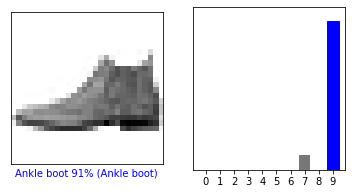

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

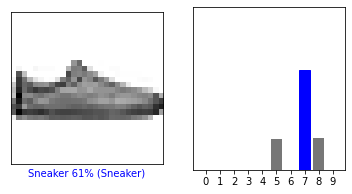

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

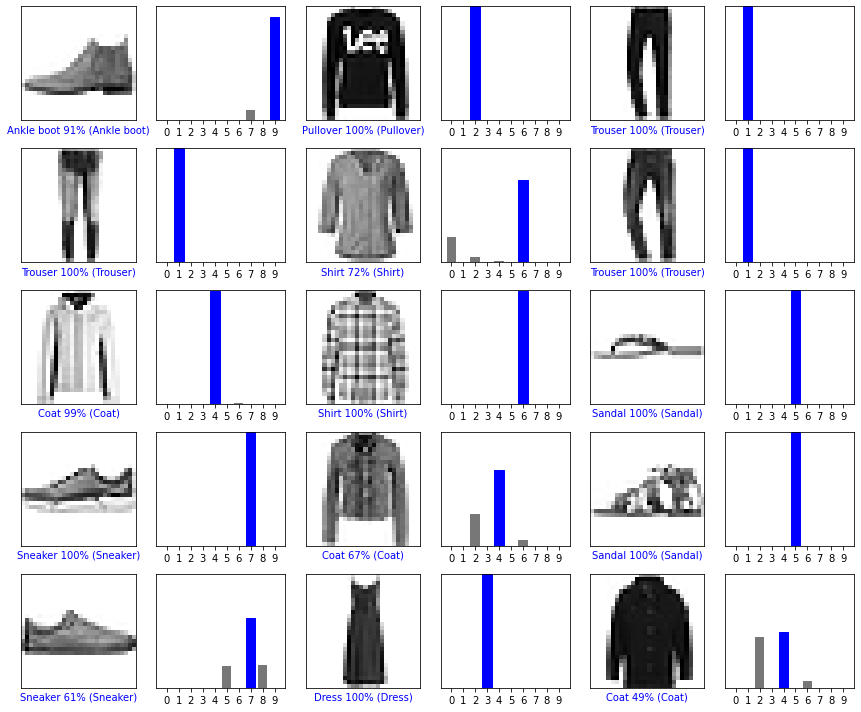

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.2673076e-05 1.9937504e-13 9.9978513e-01 1.8617269e-11 1.3060638e-04
  2.2522463e-12 7.1663781e-05 1.4157123e-21 3.1792444e-11 1.6293697e-13]]


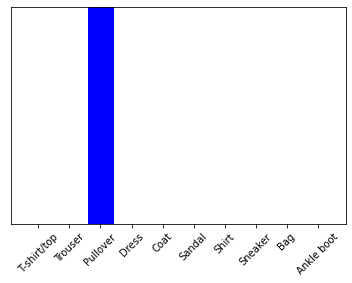

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.